# Análise de problemas de voôs utilizando aprendizado não supervisionado

Utilizando como base dados de voôs do ano de 2015, vamos realizar a análise de alguns dados e insights para montar uma análise de dados utilizando a modelagem não supervisionada.

Para iniciar, vamos baixar as bibliotecas

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as ticker
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

%pip install gdown

Note: you may need to restart the kernel to use updated packages.


Baixando os dados do Google Drive para trabalharmos

In [2]:
# Baixando dados airlines.csv
!gdown "https://drive.google.com/uc?id=1R7CXjnud_PceDr6xLITAB0ZJpJVRBbTM"

# Baixando dados airports.csv
!gdown "https://drive.google.com/uc?id=1e1Gvpsk9urYA2tSDBuJ4YPZfELvj89yZ"

# Baixando dados flights.csv
!gdown "https://drive.google.com/uc?id=1ceyRYUzkF22E_PvwKBF0s2oyhWZpRGGN"

# Baixando dados flights_red.csv
!gdown "https://drive.google.com/uc?id=1ByAbcwhO00THj9PVzJBCmTPfSoDvNRf8"


Downloading...
From: https://drive.google.com/uc?id=1R7CXjnud_PceDr6xLITAB0ZJpJVRBbTM
To: /Users/rubensrodrigues/Downloads/TC_Fase3/TC/airlines.csv
100%|██████████████████████████████████████████| 359/359 [00:00<00:00, 1.44MB/s]
Downloading...
From: https://drive.google.com/uc?id=1e1Gvpsk9urYA2tSDBuJ4YPZfELvj89yZ
To: /Users/rubensrodrigues/Downloads/TC_Fase3/TC/airports.csv
100%|███████████████████████████████████████| 23.9k/23.9k [00:00<00:00, 142kB/s]
Downloading...
From (original): https://drive.google.com/uc?id=1ceyRYUzkF22E_PvwKBF0s2oyhWZpRGGN
From (redirected): https://drive.google.com/uc?id=1ceyRYUzkF22E_PvwKBF0s2oyhWZpRGGN&confirm=t&uuid=65b248fe-d7b5-4c49-827a-38948aad712b
To: /Users/rubensrodrigues/Downloads/TC_Fase3/TC/flights.csv
100%|████████████████████████████████████████| 592M/592M [00:28<00:00, 20.5MB/s]
Downloading...
From: https://drive.google.com/uc?id=1ByAbcwhO00THj9PVzJBCmTPfSoDvNRf8
To: /Users/rubensrodrigues/Downloads/TC_Fase3/TC/flights_red.csv
100%|███████████

In [3]:
df_original = pd.read_csv('flights.csv',encoding='utf-8',low_memory=False)
df_original.head()

,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,...,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
0,2015,1,1,4,AS,98,N407AS,ANC,SEA,5,...,408.0,-22.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
1,2015,1,1,4,AA,2336,N3KUAA,LAX,PBI,10,...,741.0,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
2,2015,1,1,4,US,840,N171US,SFO,CLT,20,...,811.0,5.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
3,2015,1,1,4,AA,258,N3HYAA,LAX,MIA,20,...,756.0,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,2015,1,1,4,AS,135,N527AS,SEA,ANC,25,...,259.0,-21.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


## Preparando a database para trabalhar com os dados

In [4]:
# Agora, preenchemos os valores vazios de duas colunas numéricas: renda bruta (gross) e orçamento (budget) com 0's.

df_original.fillna({'DEPARTURE_TIME': 0}, inplace=True)
df_original.fillna({'DEPARTURE_DELAY': 0}, inplace=True)
df_original.fillna({'TAXI_OUT': 0}, inplace=True)
df_original.fillna({'WHEELS_OFF': 0}, inplace=True)
df_original.fillna({'ARRIVAL_TIME': 0}, inplace=True)
df_original.fillna({'ARRIVAL_DELAY': 0}, inplace=True)
df_original.fillna({'CANCELLATION_REASON': 0}, inplace=True)
df_original.fillna({'AIR_SYSTEM_DELAY': 0}, inplace=True)
df_original.fillna({'SECURITY_DELAY': 0}, inplace=True)
df_original.fillna({'AIRLINE_DELAY': 0}, inplace=True)
df_original.fillna({'LATE_AIRCRAFT_DELAY': 0}, inplace=True)
df_original.fillna({'WEATHER_DELAY': 0}, inplace=True)
df_original.fillna({'ELAPSED_TIME': 0}, inplace=True)
df_original.fillna({'WHEELS_ON': 0}, inplace=True)
df_original.fillna({'TAXI_IN': 0}, inplace=True)
df_original.fillna({'SCHEDULED_TIME': 0}, inplace=True)
df_original.fillna({'TAIL_NUMBER': 0}, inplace=True)
df_original.fillna({'AIR_TIME': 0}, inplace=True)

df_original['DELAYED'] = np.where(df_original['ARRIVAL_DELAY']> 0,1, 0)
df_original['DELAYED'] = np.where(df_original['DEPARTURE_DELAY']> 0,1, df_original['DELAYED'])
df_original['FLIGHT_PROBLEM'] = np.where(df_original['DIVERTED'] == 1,1, 0)
df_original['FLIGHT_PROBLEM'] = np.where(df_original['CANCELLED'] == 1,1, df_original['FLIGHT_PROBLEM'])
df_original['FLIGHT_PROBLEM'] = np.where(df_original['DELAYED'] == 1,1, df_original['FLIGHT_PROBLEM'])
df_original['ORIG_DEST_AIRPORT'] = df_original['ORIGIN_AIRPORT'].astype(str) + '_' + df_original['DESTINATION_AIRPORT'].astype(str)

df_original['SEASON'] = np.where(df_original['MONTH'] == 1 ,'Winter', '')
df_original['SEASON'] = np.where(df_original['MONTH'] == 2 ,'Winter', df_original['SEASON'])
df_original['SEASON'] = np.where((df_original['MONTH'] == 3) & (df_original['DAY'] < 20),'Winter', df_original['SEASON'])
df_original['SEASON'] = np.where((df_original['MONTH'] == 3) & (df_original['DAY'] >= 20),'Spring', df_original['SEASON'])
df_original['SEASON'] = np.where(df_original['MONTH'] == 4 ,'Spring', 'Winter')
df_original['SEASON'] = np.where(df_original['MONTH'] == 5 ,'Spring', 'Winter')
df_original['SEASON'] = np.where((df_original['MONTH'] == 6) & (df_original['DAY'] < 20),'Spring', df_original['SEASON'])
df_original['SEASON'] = np.where((df_original['MONTH'] == 6) & (df_original['DAY'] >= 20),'Summer', df_original['SEASON'])
df_original['SEASON'] = np.where(df_original['MONTH'] == 7 ,'Summer', df_original['SEASON'])
df_original['SEASON'] = np.where(df_original['MONTH'] == 8 ,'Summer', df_original['SEASON'])
df_original['SEASON'] = np.where((df_original['MONTH'] == 9) & (df_original['DAY'] < 22),'Summer', df_original['SEASON'])
df_original['SEASON'] = np.where((df_original['MONTH'] == 9) & (df_original['DAY'] >= 22),'Autumn', df_original['SEASON'])
df_original['SEASON'] = np.where(df_original['MONTH'] == 10 ,'Autumn', df_original['SEASON'])
df_original['SEASON'] = np.where(df_original['MONTH'] == 11 ,'Autumn', df_original['SEASON'])
df_original['SEASON'] = np.where((df_original['MONTH'] == 12) & (df_original['DAY'] < 21),'Autumn', df_original['SEASON'])
df_original['SEASON'] = np.where((df_original['MONTH'] == 12) & (df_original['DAY'] >= 21),'Winter', df_original['SEASON'])

df_original.head(20)

,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,...,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY,DELAYED,FLIGHT_PROBLEM,ORIG_DEST_AIRPORT,SEASON
0,2015,1,1,4,AS,98,N407AS,ANC,SEA,5,...,0,0.0,0.0,0.0,0.0,0.0,0,0,ANC_SEA,Winter
1,2015,1,1,4,AA,2336,N3KUAA,LAX,PBI,10,...,0,0.0,0.0,0.0,0.0,0.0,0,0,LAX_PBI,Winter
2,2015,1,1,4,US,840,N171US,SFO,CLT,20,...,0,0.0,0.0,0.0,0.0,0.0,1,1,SFO_CLT,Winter
3,2015,1,1,4,AA,258,N3HYAA,LAX,MIA,20,...,0,0.0,0.0,0.0,0.0,0.0,0,0,LAX_MIA,Winter
4,2015,1,1,4,AS,135,N527AS,SEA,ANC,25,...,0,0.0,0.0,0.0,0.0,0.0,0,0,SEA_ANC,Winter
5,2015,1,1,4,DL,806,N3730B,SFO,MSP,25,...,0,0.0,0.0,0.0,0.0,0.0,1,1,SFO_MSP,Winter
6,2015,1,1,4,NK,612,N635NK,LAS,MSP,25,...,0,0.0,0.0,0.0,0.0,0.0,0,0,LAS_MSP,Winter
7,2015,1,1,4,US,2013,N584UW,LAX,CLT,30,...,0,0.0,0.0,0.0,0.0,0.0,1,1,LAX_CLT,Winter
8,2015,1,1,4,AA,1112,N3LAAA,SFO,DFW,30,...,0,0.0,0.0,0.0,0.0,0.0,0,0,SFO_DFW,Winter
9,2015,1,1,4,DL,1173,N826DN,LAS,ATL,30,...,0,0.0,0.0,0.0,0.0,0.0,1,1,LAS_ATL,Winter


## Lendo estatisticas de problemas em voos (com atraso, cancelamento ou desvio do aeroporto de origem)

In [5]:
flights = len(df_original)

delayed_cond = (df_original['DELAYED'] == 1) 
df_delayed = df_original[delayed_cond]

diverted_cond = (df_original['DIVERTED'] == 1) 
df_diverted = df_original[diverted_cond]

cancelled_cond = (df_original['CANCELLED'] == 1) 
df_cancelled = df_original[cancelled_cond]

problems_cond = (df_original['FLIGHT_PROBLEM'] == 1)
df_problems = df_original[problems_cond]

print("Total de voos: ",flights)
print("Voos com atraso: ",len(df_delayed))
print("Voos desviados: ",len(df_diverted))
print("Voos cancelados: ",len(df_cancelled))
print("Voos com problemas: ",len(df_problems))

perc_problems = (len(df_problems)/flights) * 100
print(f"{perc_problems:.2f}% de voos com problemas ")


Total de voos:  5819079
Voos com atraso:  2704367
Voos desviados:  15187
Voos cancelados:  89884
Voos com problemas:  2798869
48.10% de voos com problemas 


Percebemos que há um número grande de voos com problemas, chegando a quase a metade

In [6]:
df_original.head(200)

,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,...,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY,DELAYED,FLIGHT_PROBLEM,ORIG_DEST_AIRPORT,SEASON
0,2015,1,1,4,AS,98,N407AS,ANC,SEA,5,...,0,0.0,0.0,0.0,0.0,0.0,0,0,ANC_SEA,Winter
1,2015,1,1,4,AA,2336,N3KUAA,LAX,PBI,10,...,0,0.0,0.0,0.0,0.0,0.0,0,0,LAX_PBI,Winter
2,2015,1,1,4,US,840,N171US,SFO,CLT,20,...,0,0.0,0.0,0.0,0.0,0.0,1,1,SFO_CLT,Winter
3,2015,1,1,4,AA,258,N3HYAA,LAX,MIA,20,...,0,0.0,0.0,0.0,0.0,0.0,0,0,LAX_MIA,Winter
4,2015,1,1,4,AS,135,N527AS,SEA,ANC,25,...,0,0.0,0.0,0.0,0.0,0.0,0,0,SEA_ANC,Winter
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,2015,1,1,4,UA,1224,N87531,SFO,LAX,600,...,0,0.0,0.0,0.0,0.0,0.0,1,1,SFO_LAX,Winter
196,2015,1,1,4,UA,1296,N37471,SAT,LAX,600,...,0,0.0,0.0,0.0,0.0,0.0,1,1,SAT_LAX,Winter
197,2015,1,1,4,UA,1431,N36207,BOS,LAX,600,...,0,0.0,0.0,0.0,0.0,0.0,1,1,BOS_LAX,Winter
198,2015,1,1,4,UA,1637,N33294,SEA,EWR,600,...,0,0.0,0.0,0.0,0.0,0.0,1,1,SEA_EWR,Winter


## Removendo os dados de voos sem problemas

In [7]:
# Remove row that column FLIGHT_PROBLEM is not 1
condition = (df_original['FLIGHT_PROBLEM'] == 1)

df_clean = df_original[condition]

In [8]:
#Total de voos com problemas
print("Total de voos com problemas: " , len(df_clean))


Total de voos com problemas:  2798869


Com isso reduzimos a massa para quase metade dos dados

#Analisando os dados para chegar a algum valor com mais problemas 

## Analise por Companhia aérea

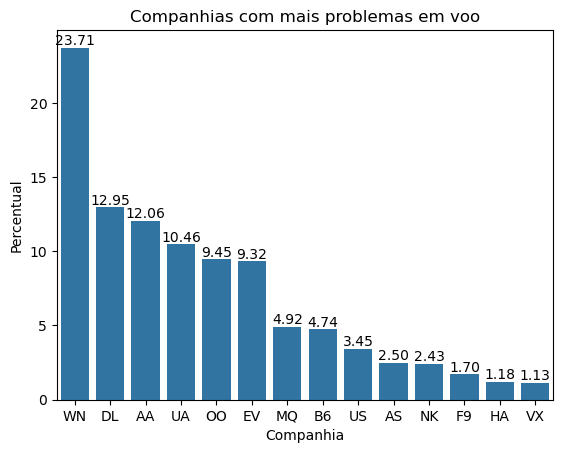

In [9]:
# Desenhando um gráfico de barras
# ax2 = sns.countplot(df, x="AIRLINE")
ax2 = sns.countplot(df_clean, x="AIRLINE", stat="percent", order=df_clean['AIRLINE'].value_counts().index)

ax2.bar_label(ax2.containers[0], fontsize=10, fmt='{:.2f}');

plt.title('Companhias com mais problemas em voo')
plt.xlabel('Companhia')
plt.ylabel('Percentual')
plt.show()

# Mostra o gráfico
plt.show();

Percebemos que há uma grande disparidade entre companhia aéreas que mais causam atraso. A WN (Southwest Airlines Co) é responsável por quase 25% dos problemas com voos

## Analise por Origem / Destino

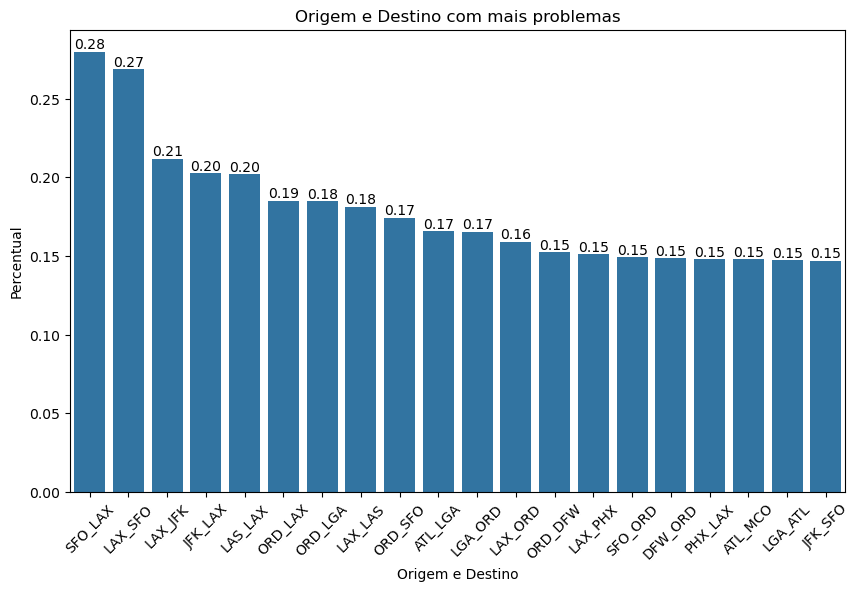

In [10]:

top_10_categories = df_clean['ORIG_DEST_AIRPORT'].value_counts().index[:20]

plt.figure(figsize=(10, 6)) # Adjust figure size for better readability
ax2 = sns.countplot(
    data=df_clean,
    x='ORIG_DEST_AIRPORT',
    order=top_10_categories,
		stat="percent"
)

plt.xticks(rotation=45) 

ax2.bar_label(ax2.containers[0], fontsize=10,fmt='{:.2f}');

plt.title('Origem e Destino com mais problemas')
plt.xlabel('Origem e Destino')
plt.ylabel('Percentual')
plt.show()


Percebemos que não há um voo (origem e destino) que se destaca com maior número de atrasos

## Análise por mês

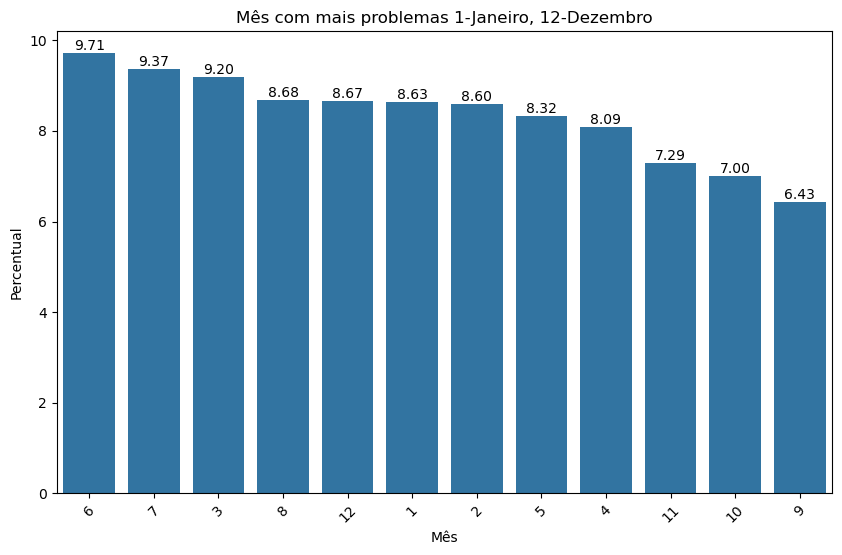

In [11]:
top_10_categories = df_clean['MONTH'].value_counts().index[:20]

plt.figure(figsize=(10, 6)) # Adjust figure size for better readability
ax2 = sns.countplot(
    data=df_clean,
    x='MONTH',
    order=top_10_categories,
		stat="percent"
)

plt.xticks(rotation=45) 

ax2.bar_label(ax2.containers[0], fontsize=10,fmt='{:.2f}');

plt.title('Mês com mais problemas 1-Janeiro, 12-Dezembro')
plt.xlabel('Mês')
plt.ylabel('Percentual')
plt.show()

Percebemos que não meses que mais se destacam em atrasos de voos

## Análise por dia da semana

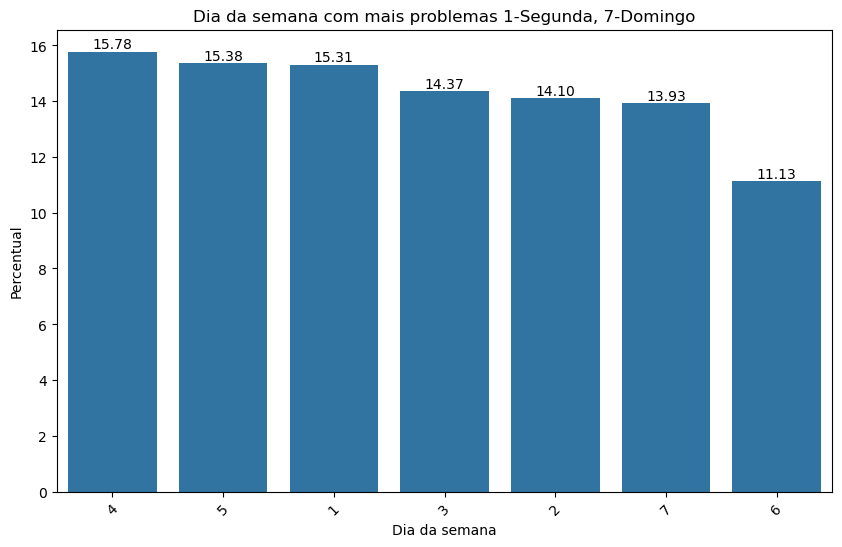

In [12]:
top_10_categories = df_clean['DAY_OF_WEEK'].value_counts().index[:20]

plt.figure(figsize=(10, 6)) # Adjust figure size for better readability
ax2 = sns.countplot(
    data=df_clean,
    x='DAY_OF_WEEK',
    order=top_10_categories,
		stat="percent"
)

plt.xticks(rotation=45) 

ax2.bar_label(ax2.containers[0], fontsize=10,fmt='{:.2f}');

plt.title('Dia da semana com mais problemas 1-Segunda, 7-Domingo')
plt.xlabel('Dia da semana')
plt.ylabel('Percentual')
plt.show()

Percebemos que não há dias da semanas que mais se destacam em atrasos de voos

## Análise por Estação do ano

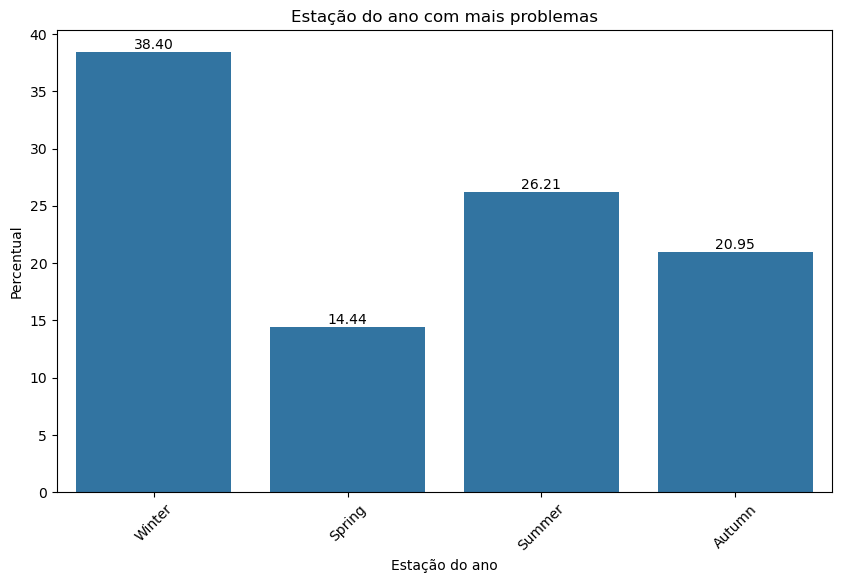

In [13]:

plt.figure(figsize=(10, 6)) # Adjust figure size for better readability
ax2 = sns.countplot(
    data=df_clean,
    x='SEASON',
		stat="percent"
)

plt.xticks(rotation=45) 

ax2.bar_label(ax2.containers[0], fontsize=10,fmt='{:.2f}');

plt.title('Estação do ano com mais problemas')
plt.xlabel('Estação do ano')
plt.ylabel('Percentual')
plt.show()

Percebemos que há um destaque no inverno que possue 39% dos voos com problemas.

# Aplicação dos modelos

Com base nessas análises optamos por utilizar as dimensões de AIRLINE, SEASON_NUM e DAY_OF_WEEK para realização das análises

Como o modelo de classificação se adequa mais ao nosso problema, vamos testar alguns dos tipos desse modelo para verificar qual retorna uma maior classificação

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

Aplicando One Hot Enconding em variaveis categoricas

In [15]:

# Aplicando One Hot Encoding

df_original['SEASON_NUM'] = df_original['SEASON'].astype('category').cat.codes
df_original['AIRLINE_NUM'] = df_original['AIRLINE'].astype('category').cat.codes
df_original['ORIGIN_AIRPORT_NUM'] = df_original['ORIGIN_AIRPORT'].astype('category').cat.codes
df_original['DESTINATION_AIRPORT_NUM'] = df_original['DESTINATION_AIRPORT'].astype('category').cat.codes
df_original['TAIL_NUMBER_NUM'] = df_original['TAIL_NUMBER'].astype('category').cat.codes
df_original['CANCELLATION_REASON_NUM'] = df_original['CANCELLATION_REASON'].astype('category').cat.codes

df_original.drop(columns=['SEASON', 'AIRLINE', 'ORIGIN_AIRPORT', 'DESTINATION_AIRPORT', 'TAIL_NUMBER', 'CANCELLATION_REASON'], inplace=True)


In [ ]:
#Trabalhando com os dados atuais

x = df_original[["AIRLINE_NUM",
        "SEASON_NUM", 
        "DAY_OF_WEEK",
				"ORIGIN_AIRPORT_NUM",
				"DESTINATION_AIRPORT_NUM"]]
y = df_original["FLIGHT_PROBLEM"]

# df_original = df_original.sample(n=50000) 

x_train , x_test, y_train, y_test = train_test_split(x, y, test_size=.3, random_state=23)

## Regressão Logística

In [17]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(x_train, y_train)

y_pred = model.predict(x_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average="micro")
recall = recall_score(y_test, y_pred, average="micro")
f1 = f1_score(y_test, y_pred, average='micro')

print("accuracy ", accuracy)
print("precision ", precision)
print("recall ", recall)
print("f1 ", f1)

/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


accuracy  0.5448661987805633
precision  0.5448661987805633
recall  0.5448661987805633
f1  0.5448661987805633


## Arvore de Decisão

In [18]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier()
model.fit(x_train, y_train)

y_pred = model.predict(x_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average="micro")
recall = recall_score(y_test, y_pred, average="micro")
f1 = f1_score(y_test, y_pred, average='micro')

print("accuracy ", accuracy)
print("precision ", precision)
print("recall ", recall)
print("f1 ", f1)

accuracy  0.5843667154716324
precision  0.5843667154716324
recall  0.5843667154716324
f1  0.5843667154716324


## KNN

In [19]:
from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier(n_neighbors=3)
model.fit(x_train, y_train)

#ignorado pois o tempo computacional é inviável

y_pred = model.predict(x_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average="micro")
recall = recall_score(y_test, y_pred, average="micro")
f1 = f1_score(y_test, y_pred, average='micro')

print("accuracy ", accuracy)
print("precision ", precision)
print("recall ", recall)
print("f1 ", f1)

accuracy  0.5482848376948475
precision  0.5482848376948475
recall  0.5482848376948475
f1  0.5482848376948475


## Support Vector Machines (SVM)

In [ ]:
from sklearn.svm import SVC


# Criando e treinando o modelo SVM
modelo = SVC()
modelo.fit(x_train, y_train)

# Fazendo previsões sobre o conjunto de dados de teste
y_pred = modelo.predict(x_test)

# Calculando a acurácia do modelo
accuracy = accuracy_score(y_test, y_pred)
print(f"Acurácia: {accuracy}")

## RNN - Perceptron

In [ ]:
from sklearn.linear_model import Perceptron


# X = df_original[["sepal_length", "sepal_width"]]
# y = df_original["species"]

# Dividindo o conjunto de dados em treinamento e teste
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

# Treinando o modelo Perceptron
modelo = Perceptron()
modelo.fit(x_train, y_train)

# Fazendo previsões com o modelo treinado
y_pred = modelo.predict(x_test)

# Avaliando o desempenho do modelo
accuracy = accuracy_score(y_test, y_pred)

print(f"Acurácia: {accuracy}")
Acurácia: 0.8

Acurácia: 0.4815333333333333


## RNN - Multilayer Percepton

In [ ]:
from sklearn.neural_network import MLPClassifier

In [ ]:

mlp = MLPClassifier()

# Treinando o modelo Multilayer Perceptron
mlp.fit(x_train, y_train)

# Fazendo previsões sobre o conjunto de dados de teste
y_pred = mlp.predict(x_test)

# Calculando a acurácia do modelo
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average="micro")
recall = recall_score(y_test, y_pred, average="micro")
f1 = f1_score(y_test, y_pred, average='micro')

print("accuracy ", accuracy)
print("precision ", precision)
print("recall ", recall)
print("f1 ", f1)

accuracy  0.5406666666666666
precision  0.5406666666666666
recall  0.5406666666666666
f1  0.5406666666666666


## Analise Final

Com base nos insights e nos modelos trabalhamos percebemos que os modelos que trouxeram os melhores resultados foram o Support Vector Machines (SVM) e o Multilayer Perceptron.

Utilizando essa base, optamos pela utilização do SVM como principal.

Os próximos passos seriam melhorar a questão de quais campos podem estar mais relacionados a questão de problemática, uma vez que não foi possível perceber uma variação linear muito forte entre eles

